In [1]:

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Check the structure of the measurement class
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])
    
  


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:

#Create last date query to make see what most recent data point is
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_date

('2017-08-23')

In [12]:
#Split/Parse date into year, month and day

for date in last_date:
    sep_date=date.split('-')   
sep_date

['2017', '08', '23']

In [13]:
#Use list identifier to calculate a year in the past date

year=int(sep_date[0]); 
month=int(sep_date[1]); 
day=int(sep_date[2]);

first_date = dt.date(year, month, day) - dt.timedelta(days=365)

first_date

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
precip_year = session.query(Measurement.date, Measurement.prcp).\
filter(func.strftime(Measurement.date)>= first_date).\
order_by(Measurement.date).all()
#Print out precipitation data
precip_year



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precip_year = pd.DataFrame(precip_year, columns = ['Date','Precipitation'])

#set index as date
df_precip_year.set_index('Date')





Precipitation
Date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02
2016-08-23           1.79
2016-08-23           0.70
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.22
2016-08-24           2.15
2016-08-24           1.45
2016-08-25           0.08
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.11
2016-08-26           0.00
2016-08-26           0.03
2016-08-26           0.02
2016-08-26           0.04
2016-08-26           0.00
2016-08-26           0.01
2016-08-27           0.00
2016-08-27           0.18
2016-08-27           0.02
...                   ...
2017-08-16           0.00
2017-08-16           0.07
2017-08-16           0.12
2017-08-16           0.42
2017-08-17           0.00
2017-08-17           0.05
2017-08-17           0.01
2017-08-17           0.13
2017-08-18           0.00
2017-08-18           0.00
2017-08-18           0.06
2017-08-18            NaN
2017-08-19           0.00
2017-08-19           0.00
2017-08-19            NaN
2017-08-19           0.09
2017-08-20           0.00
2017-08-20           0.01
2017-08-20            NaN
2017-08-21           0.00
2017-08-21           0.02
2017-08-21            NaN
2017-08-21           0.56
2017-08-22           0.00
2017-08-22           0.00
2017-08-22           0.50
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2230 rows x 1 columns]

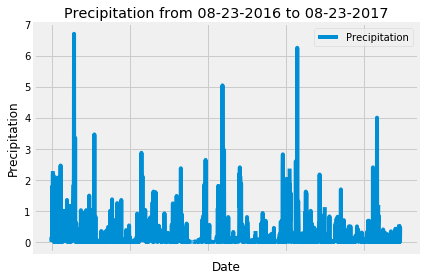

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df_precip_year.plot('Date', 'Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation from 08-23-2016 to 08-23-2017')
plt.legend(['Precipitation'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the Figure
plt.show()

In [17]:

#Statistically desribe the dataframe containing the preciptation data
df_precip_year.describe()

Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

In [18]:
#Inspect the Station class

columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])




id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:

#Query the number of indiviual stations
num_stations = session.query(Station.station).count()
num_stations

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?

station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.

station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp_data = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()

#Assign the most active station as the first in the query results
most_station = temp_data[0]


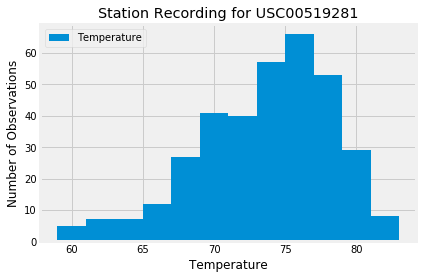

In [22]:
# Choose the station with the highest number of temperature observations.

temp_by_stat= session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == most_station).\
filter(func.strftime(Measurement.date)>= first_date).\
order_by(Measurement.date).all()


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df_temp_by_stat = pd.DataFrame(temp_by_stat, columns =['Date', 'Temperature'])
df_temp_by_stat.set_index('Date', inplace = True)
df_temp_by_stat
df_temp_by_stat.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Number of Observations")
plt.title("Station Recording for " + most_station)




plt.show()





In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


# function usage example

this_year= calc_temps('2012-02-28', '2012-03-05')
print(this_year)


[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


#Used time and date parsing to calculate the previous year date
sep_date1 = dt.datetime.strptime('2012-02-28', '%Y-%m-%d')
start_date_yr = sep_date1 - dt.timedelta(days=365)
dt.datetime.isoformat(start_date_yr)
sep_date2 = dt.datetime.strptime('2012-03-05', '%Y-%m-%d')
end_date_yr = sep_date2 - dt.timedelta(days=366)
dt.datetime.isoformat(end_date_yr)

#Use def calc_temps to calculate prior dates temperature information
last_year = calc_temps(start_date_yr, end_date_yr)
print(last_year)

[(61.0, 69.775, 74.0)]


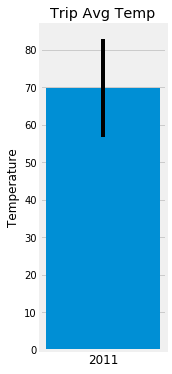

In [26]:
# Plot the results from your previous query as a bar chart. 

plt.subplots(figsize=(2,6))
x = len(last_year)
y=last_year[0][1]
err = last_year[0][2] - last_year[0][0]
plt.bar(x, y, yerr=err)
plt.xticks([0])
plt.xlabel('2011')
plt.ylabel("Temperature")

# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp")
plt.show()





In [27]:
#Reinspect class Station
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [43]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
            filter(Measurement.date >= start_date_yr).filter(Measurement.date <= end_date_yr).\
            join(Measurement, Measurement.station==Station.station).\
            group_by(Measurement.station).\
            order_by(func.sum(Measurement.prcp).desc()).all()

rainfall_df = pd.DataFrame(rainfall, columns = ['Station ID', 'Station Name', 'Station Latitude', 'Station Longitude', 'Station Elevation','Total Precipitation'])
rainfall_df.set_index('Station ID', inplace=True)


rainfall_df

Station Name  Station Latitude  \
Station ID                                                              
USC00518838              UPPER WAHIAWA 874.3, HI US          21.49920   
USC00519281                     WAIHEE 837.5, HI US          21.45167   
USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US          21.33556   
USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US          21.52130   
USC00516128            MANOA LYON ARBO 785.2, HI US          21.33310   
USC00513117                    KANEOHE 838.1, HI US          21.42340   
USC00519397                    WAIKIKI 717.2, HI US          21.27160   
USC00511918       HONOLULU OBSERVATORY 702.2, HI US          21.31520   
USC00517948                       PEARL CITY, HI US          21.39340   

             Station Longitude  Station Elevation  Total Precipitation  
Station ID                                                              
USC00518838         -158.01110              306.6                 2.33  
USC00519281         -157.84889               32.9                 2.23  
USC00519523         -157.71139               19.5                 2.17  
USC00514830         -157.83740                7.0                 1.96  
USC00516128         -157.80250              152.4                 1.45  
USC00513117         -157.80150               14.6                 1.44  
USC00519397         -157.81680                3.0                 1.38  
USC00511918         -157.99920                0.9                 0.63  
USC00517948         -157.97510               11.9                  NaN

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
